<h1 align="center"> Photons != Science, <br>and the Challenges of Turning the Former into the Later</h1>

<br>

<div align="center">
<font size="+10"> Adam A Miller </font>
<br>
(CIERA/Northwestern/Adler)
<br>
<br>
LSSTC DSFP Session 11, 18 Aug 2020</div>

## Introduction

<br>
Session 11 is focused on imaging processing, and, informally attempts to answer the question: what happens between the glass and the database? 
<br>





When most people imagine the Vera C. Rubin Observatory, they envision this: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/2015-SL_LSST_LSSTIllus.jpg" align="middle">

<div align="right"> <font size="-3">(credit: Kavli foundation) </font></div>

You (almost certainly) will never actually visit the Rubin Observatory.

Instead, your interactions with the Rubin Observatory will look like this: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/ps1_casjobs.png">

<div align="right"> <font size="-3">(credit: PS1 casjobs) </font></div>

Given the impending deluge of data from the Rubin Observatory's Legacy Survey of Space and Time (LSST), and Euclid, and the Nancy Grace Roman Telescope, etc, one might argue that only 2 skills are necessary for success in the LSST era:

  1. Advanced programming skills (`python`, SQL, etc) 
  - Statistical knowledge (machine learning, Bayes, etc)

Finding an actual strawperson to make this specific argument may be hard, but if you looked hard enough I bet you could find someone that would argue the validity of the above statement. 

Indeed, these two skills are the precise focus of the DSFP.

Master them, and you will be a fully practicioning data scientist.

But! This conclusion is missing a key ingredient: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Data_Science_VD.png">

<div align="right"> <font size="-3">(credit: Drew Conway) </font></div>

**Domain Knowledge is an essential ingredient for the data science practitioner.** 

To "prove" this is the case, let's consider some conclusions that would be derived from the LSST database without a working knowledge of astronomy (and the LSST detectors):

### Incorrect Conclusion #1

There are no galaxies fainter than $i \approx 27.5 \, \mathrm{mag}$.

[Perhaps this signals the edge of the universe...]

This apparent conclusion is due to the inverse-square law for flux, $f \propto r^{-2}$, combined with the sensitivity limit of the LSST detector. We know fainter galaxies do exist, but they are either too distant or intrinsically dim to be detected by LSST.

### Incorrect Conclusion #2

Two stars cannot be closer than $\sim$0.35 arcsec in the sky.

[Perhaps there is some repulsive force between stars that keeps them separated...]

This apparent conclusion reflects the typical seeing at Cerro Pachon ($\sim$0.7 arcsec). Very nearby stars ($\theta < 0.3$ arcsec), cannot be resolved by LSST.

### Incorrect Conclusion #3

The Universe emits more light in the $r$-band than the $y$-band <br> (i.e., $\sum r_\mathrm{flux} > \sum y_\mathrm{flux}$).

[Red is the color of the Chicago Bulls, who had the greatest basketball player ever, Michael Jordan, so perhaps the Universe is trying to confirm something we already know...] 

This apparent conclusion is a bit more subtle than the previous two, and there are multiple factors contributing to this incorrect assertion.\* LSST will be far more sensitive in the $r$-band than the $y$-band (lower sky backgrounds and higher detector efficiency are the primary reasons). Blue sources naturally emit more light in the $r$-band than the $y$-band, but this imbalance should be countered by red sources (due to reddening and redshift there *should* be a lot more apparently red sources in the universe than blue sources). Many red sources ($m_r - m_y > 0$) will only be detected in the $r$-band, however, due to the relative sensitivity in each filter. 


\* *Note* - If you have a convincing argument that there is more $r$-band flux than $y$-band flux in the Universe let me know.

### Upshot

Domain knowledge (of both astrophysics *and* the full telescope system) will be an essential ingredient for success once the Rubin Observatory begins the LSST. LSST will push the boundaries for the 3 Vs (volume, variety, and velocity) of data science for astronomy. Success in this era will require substantial working knowledge of both "hacking" and "stats/mathematical analysis", but progress will be impeded without a corresponding expertise in how the data were acquired and why the Universe produced those data in the first place.

## Telescopes

<br><br><br><br><br>






Here's a true story...

The Imaginery Telescope has a diameter of 1 AU and it detects *all* wavelengths of the EM spectrum with 100% efficiency. It is revolutionary in it's design, and, as you might imagine, it will serve as a complete game changer for the field of astronomy.

(pssst –– as you also might imagine it is completely imaginary)

Fundamentally, the thing we care about is measuring fluxes (and positions - though these two are related).

In principle, flux measurements are straight forward: count the number of photons per unit energy per unit time and you're done. 

If you want to be more sensitive to faint fluxes increase the size of your telescope (this is why the Imaginery Telescope is so powerful...)

In practice, things are not this simple: 
  -  telescope's optical elements are not 100% efficient <br>
      (we *can* measure inefficiencies and correct them $\rightarrow$ complicates the uncertainties beyond Poisson)
  -  our detectors introduce noise to our measurements <br>
  -  detectors eventually stop counting photons <br>
      (saturation)

In practice, things are not this simple (con't): 
  -  cannot measure absolute position of photons <br>
      (Heisenberg)
  -  further complicated by pixelated detectors  <br>
      (cannot measure continuous distribution)
  -  shutter opening and closing produces a variable exposure time across focal plane <br><br>
 

In summary, while our basic task — counting — is in principle quite simple, measuring the flux/position of an astronmical source is somewhat complicated. We control all the elements of the system, however, and a variety of different measurements can correct for these issues (though this results in more challenging uncertainty estimates).

There is an important element that we cannot control:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/clouds.png" width="600">


The atmosphere really really complicates everything, making calibration a *nightmare*.

Turbulence distorts the signal, but clouds are the real pain. It's very difficult to measure the absolute attenuation of incident photons due to clouds. 

Colin will address this in more detail, but, briefly, we can calibrate the number of photons that we have counted to an actual measure of flux by (i) agreeing that there is a small handful of stars that are *not variable*, with *precisely known flux*. Then (ii) on nights that are "photometric" we observe these "standard stars" and the sources we care about, make some asumptions about atmospheric attenuation, and finally, (iii) we compare the relative counts in the detector for the standard stars and the sources we care about to determine the absolute flux for the sources we care about.

**Break Out Problem 1**

Given all these complications, how can one actually make any (informed) inferences about the universe?

*Hint* - think back to the previous session.

**Solution to Break Out 1**

Bayes! 

We can write down a likelihood function that parameterizes everything (detector noise, atmospheric conditions, optical efficiency, time-dependent emission from the sources we care about), run a giant MCMC to integrate the posterior and marginalize over everything but the astronomical sources to answer any question we might ask of the observations.

<font size="-1"> But,  </font> <font size="+3"> but,  </font> <font size="+5"> but...  </font>

## Speed Matters

<br><br><br><br><br>







As previously noted, the velocity and volume of LSST observations are going to be enormous. There isn't enough computing power in the world to sample a posterior that accounts for every photon detected by LSST. 

**Break Out Problem 2**

How long would it take to perform basic processing of all of LSST on your laptop? 

The bare minimum for image processing includes bias (subtraction) and flat-field (division) corrections. Assume your laptop has a single 3 GHz processor that requires 1 tick to perform a single addition operation and 4 ticks to perform a single subtraction operation.

**Solution to Break Out 2**

$$\frac{3.2 \times 10^9 \,\mathrm{pix}}{\mathrm{FOV}} \times \frac{\mathrm{FOV}}{10 \, \mathrm{deg}^2} \times 20{,}000\, \mathrm{deg}^2 \\ \times \frac{5\,\mathrm{ticks}}{\mathrm{pix}} \times \frac{\mathrm{s}}{3 \times 10^9 \,\mathrm{ticks}} \times 1000\,\mathrm{obs} \approx 4 \,\mathrm{months}$$

**A more realistic solution to Break Out 2**

Based on PTF, it takes $\sim$30 s to fully process (bias, flat-field, astrometry, photometry, image subtraction...) 1M pixels (much of this is tied up in I/O). Using the same numbers from the previous example, LSST will take $\sim$200 yr to process.

P.S. Fortunately we can parallelize these calculations. 

## Conclusions

Most astronomers will only "know" LSST via the database.

Domain knowledge will nevertheless be vitally important.

A lot of complicated analysis happens between the glass and the database.

#### Create fake images

There are many simulated images shown in this talk. The code to recreate those images is included below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
%matplotlib notebook

Make an image of a star field

<IPython.core.display.Javascript object>


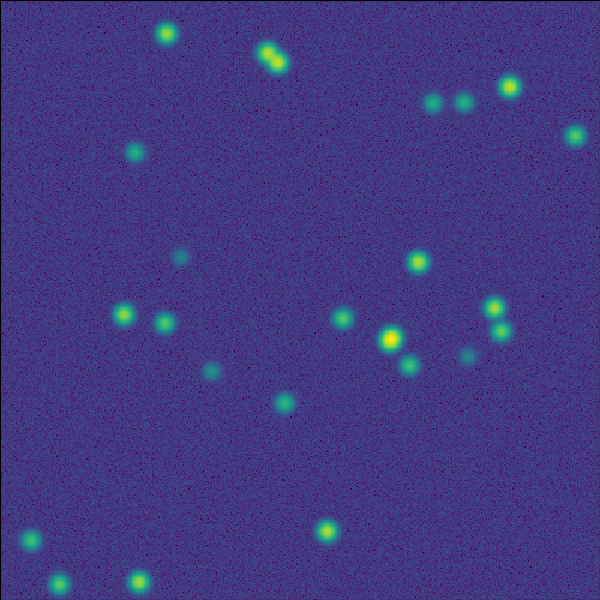

In [3]:
np.random.seed(42)

bkg = np.random.normal(100, 20, size=(500,500))

x, y = np.meshgrid(np.arange(500), np.arange(500))

nstar = 25
mu = np.random.uniform(10,490, size=(nstar,2))
var = 16
amp = np.random.uniform(100,5000, size=nstar)

data = bkg + np.sum([a*np.exp(-(np.hypot(x-m[0], y-m[1])**2)/(2*var)) for a, m in zip(amp, mu)], axis=0)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.arcsinh(data), origin='lower', vmin=4.4)
ax.set_xticks([])
ax.set_yticks([])
fig.subplots_adjust(left=0.0,right=1,top=1,bottom=0)
fig.savefig('./images/star_field.png')

In [4]:
mu = (230,270)
sig_x = 80
sig_y = 35
rho = 0.25
amp=2000
dat = amp*np.exp(-( (x-mu[0])**2/(2*sig_x**2) + (y-mu[1])**2/(2*sig_y**2) 
                    - 2*rho*((x-mu[0])*(y-mu[1]))/(sig_x*sig_y)
                  )
                )
bkg = np.random.normal(150, 30, size=(500,500))

<IPython.core.display.Javascript object>


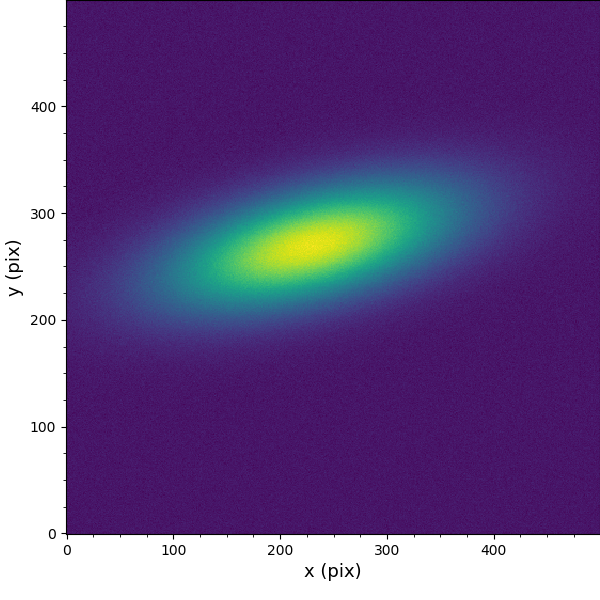

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(dat+bkg, origin='lower')
ax.set_xlabel('x (pix)',fontsize=13)
ax.set_ylabel('y (pix)',fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(25))
fig.subplots_adjust(left=0.11,bottom=0.11,right=1,top=1)
fig.savefig('./images/galaxy1.png')

<IPython.core.display.Javascript object>


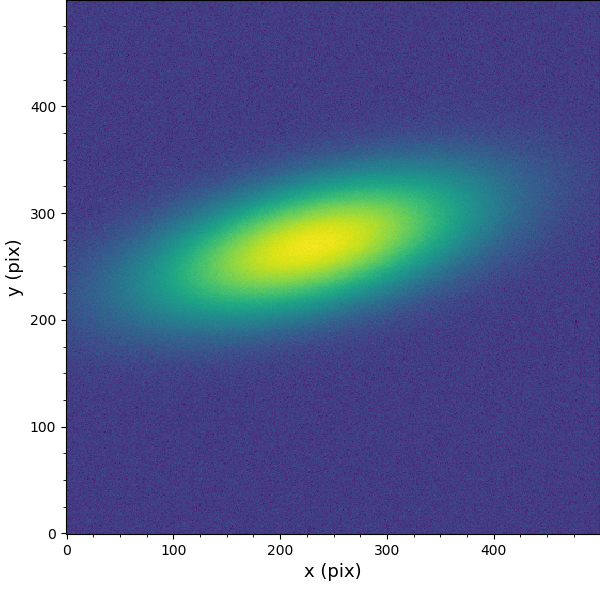

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.sqrt(dat+bkg), origin='lower')
ax.set_xlabel('x (pix)',fontsize=13)
ax.set_ylabel('y (pix)',fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(25))
fig.subplots_adjust(left=0.11,bottom=0.11,right=1,top=1)
fig.savefig('./images/galaxy2.png')

<IPython.core.display.Javascript object>


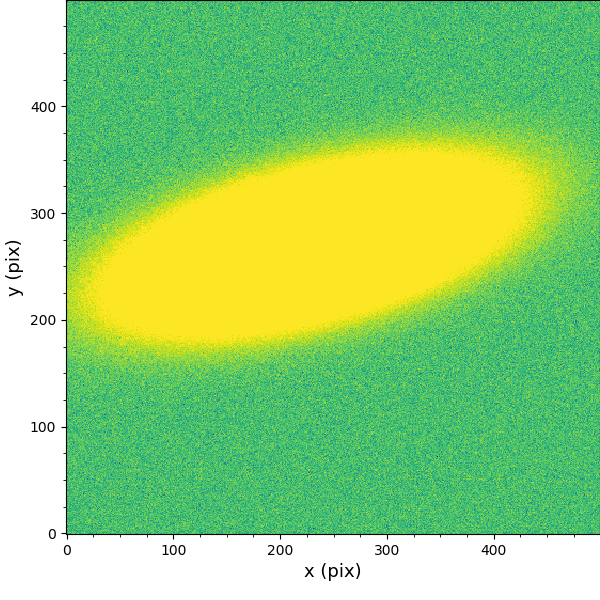

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.arcsinh(dat+bkg), origin='lower', vmax=6.5)
ax.set_xlabel('x (pix)',fontsize=13)
ax.set_ylabel('y (pix)',fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(25))
fig.subplots_adjust(left=0.11,bottom=0.11,right=1,top=1)
fig.savefig('./images/galaxy3.png')

<IPython.core.display.Javascript object>


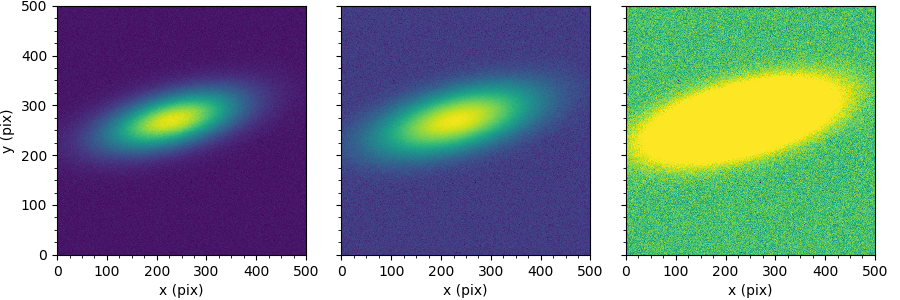

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3), sharex=True, sharey=True)
ax1.imshow(dat+bkg, origin='lower')
ax2.imshow(np.sqrt(dat+bkg), origin='lower')
ax3.imshow(np.arcsinh(dat+bkg), origin='lower', vmax=6.5)
for ax in (ax1, ax2, ax3):
    ax.set_xlabel('x (pix)',fontsize=10)
    
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(25))
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(MultipleLocator(25))
ax1.set_ylabel('y (pix)',fontsize=10)
fig.subplots_adjust(right=0.99,top=0.98,wspace=0.01, bottom=0.15,left=0.045)
fig.savefig('./images/all_galaxies.png')